<a href="https://colab.research.google.com/github/farhanridhollah/Classification-Banana-Cavend-Kelompok-2-Matrix/blob/main/Kelompok_2_Matrix_Classification_Cavendish_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAMA ANGGOTA KELOMPOK 2 KELAS MATRIX**

* FARHAN RIDHOLLAH (4652380)
* SULTAN ARRASYID (4499811)
* FANI ANJELINA (4605448)
* AURA NISSA GALUH SUANDA (4538152)
* AMALINA SEPTIANI AZHARA (5701349)


# Bagian Baru

## Import Dataset

Jalankan perintah dibawah untuk mendownload dataset yang akan digunakan. atau kalian juga boleh menggunakan dataset yang kalian cari sendiri. Dataset ini hanya **OPTIONAL**, Karna kami sudah memiliki data set sendiri maka data set dapat dari google drive

https://drive.google.com/drive/folders/1Dhk0gqM_ZBDvlUs3S_ggVDPH-YbG0gui?usp=share_link

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Packages
Import packages apa saja yang kalian perlukan dalam project ini


In [ ]:
# import packages
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import Dense, MaxPooling2D, Dropout, Conv2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.callbacks import EarlyStopping

## Generate Dataset

Tentukan path data train dan validation, kemudian gunakan ImageDataGenerator terhadap data train dan data validation.

In [ ]:


# menentukan direktori dataset training dan validation
train_dir = '/content/drive/MyDrive/DataPisang/DataTraining'
valid_dir = '/content/drive/MyDrive/DataPisang/DataTesting'

# menentukan ukuran gambar
img_width, img_height, channel = (224, 224, 3)




# **Melakukan Data Generator**

**Data Generator pada train dataset**

In [ ]:
# melakukan Data Generator pada train dataset
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 753 images belonging to 3 classes.


**Data Generator pada validation dataset**

In [ ]:
# melakukan Data Generator pada validation dataset
valid_datagen = ImageDataGenerator(
    rescale = 1./255
)

valid_data = valid_datagen.flow_from_directory(
    valid_dir,
    target_size = (img_width, img_height),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 180 images belonging to 3 classes.


In [ ]:
classes = train_data.class_indices
classes

{'busuk': 0, 'masak': 1, 'mentah': 2}

## Membuat Model

Silakan kalian bangun model CNN kalian sesuai kreasi kalian pada cell dibawah ini, kalian juga bisa menggunakan Pretrained model pada project ini.

**NOTE**: Perhatikan jumlah label pada dataset dan Jumlah channel pada data.

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications import InceptionV3

base_model = InceptionV3(
    input_shape=(img_width, img_height, 3),
    include_top=False,
    weights='imagenet'
)

for layer in base_model.layers:
    layer.trainable = False

base_model.summary()

87910968/87910968 [==============================] - 0s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)           

**Modifikasi Pre trained model**

In [ ]:
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=x)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

## Compile Model
Silakan buat compile model untuk menentukan optimizer, loss, dan metric yang akan ditampilkan saat training!

In [ ]:
# membuat compile model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics= [Recall(), Precision(), "accuracy"]
)

## Membuat Callback

Silakan buat callback agar dapat digunakan pada saat training. Kalian bisa menggunakan Early Stopping seperti pada sesi hands on atau callback yang lain.

In [ ]:
# membuat callback
model_callback = EarlyStopping(
    monitor = 'loss',
    verbose = 1,
    mode = 'min',
    patience = 3
)

## Membuat Fit Model

Silakan buat fit model dengan menentukan epoch, step_per_epoch, callback, dan verbose untuk proses training. Jalankan dan tunggu hingga proses training selesai

In [ ]:
# membuat fit model
history = model.fit(
    train_data,
    validation_data = valid_data,
    epochs = 25,
    steps_per_epoch = 10, #usahakan step per epoch sesuai dengan hasil bagi dari jumlah training data dan batch size
    callbacks = [model_callback],
    verbose = 1
)

Epoch 1/25
10/10 [==============================] - 68s 7s/step - loss: 0.4790 - recall: 0.7500 - precision: 0.7843 - accuracy: 0.7625 - val_loss: 0.4309 - val_recall: 0.7722 - val_precision: 0.8129 - val_accuracy: 0.8056
Epoch 2/25
10/10 [==============================] - 69s 7s/step - loss: 0.4427 - recall: 0.7906 - precision: 0.8032 - accuracy: 0.8000 - val_loss: 0.4493 - val_recall: 0.7889 - val_precision: 0.7978 - val_accuracy: 0.8000
Epoch 3/25
10/10 [==============================] - 63s 6s/step - loss: 0.4394 - recall: 0.7705 - precision: 0.7807 - accuracy: 0.7738 - val_loss: 0.4125 - val_recall: 0.7667 - val_precision: 0.8070 - val_accuracy: 0.7944
Epoch 4/25
10/10 [==============================] - 64s 7s/step - loss: 0.4033 - recall: 0.7688 - precision: 0.7987 - accuracy: 0.7969 - val_loss: 0.4091 - val_recall: 0.7889 - val_precision: 0.8208 - val_accuracy: 0.7944
Epoch 5/25
10/10 [==============================] - 61s 6s/step - loss: 0.4358 - recall: 0.7688 - precision: 0.7

## Evaluasi

Lakukan evaluasi pada hasil training dengan menampilkan metric dan juga grafik loss atau accuracy dari proses training. Bila hasil evaluasi masih jelek, kalian bisa melakukan tuning atau mengubah model CNN kalian kembali

**NOTE** : kalian juga dapat menambahkan metric lain

In [ ]:
# evaluasi hasil model kalian disini
model.evaluate(valid_data)

6/6 [==============================] - 19s 3s/step - loss: 0.4128 - recall: 0.7667 - precision: 0.7931 - accuracy: 0.7778


[0.4127703309059143,
 0.7666666507720947,
 0.7931034564971924,
 0.7777777910232544]

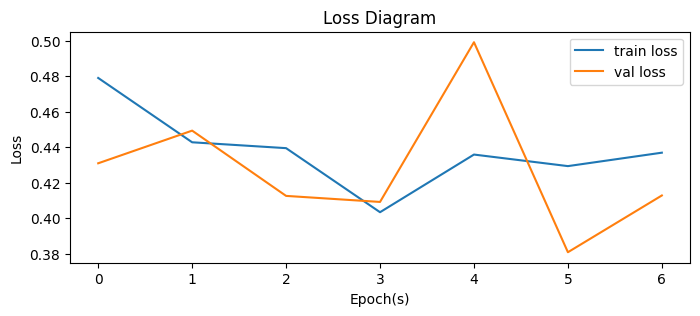

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])
plt.legend(['train loss', 'val loss'])
plt.title('Loss Diagram')
plt.xlabel('Epoch(s)')
plt.ylabel('Loss')
plt.show()

# Simpan Model

Jangan lupa untuk menyimpan model kalian

In [ ]:
# save model
model.save('myModel.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

path_model_save = 'myModel.h5'
loaded_model = load_model(path_model_save)

## Load Model dan Jalankan Model

Silakan gunakan model hasil training kalian untuk menklasifikasi sebuah gambar baru.

NOTE : Pastikan gambar yang kalian masukkan sesuai dengan dataset kalian.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  img_path = '/content/' + fn
  img = image.load_img(img_path, target_size=(224, 224));
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)

  classes = loaded_model.predict(img_array/255);

  for i, class_ in enumerate(classes[0]):
      if class_ == classes[0].max():
          if i == 0:
              print("Pisang Busuk")
          elif i == 1:
              print("Pisang Masak")
          else:
              print("Pisang Mentah")

Saving download.jPG to download.jPG
1/1 [==============================] - 0s 26ms/step
Pisang Mentah


Kesimpulannya bisa dilihat di atas bahwa untuk akurasi nya 83%